In [20]:
from scrape import scrapeBracket
from selenium import webdriver
import matplotlib.pyplot as plt
import numpy as np

In [2]:
driver = webdriver.Chrome('./chromedriver')

In [17]:
i = 7620
res = []
while len(res) < 3000:
    res.extend(scrapeBracket(driver, i))
    i -= 1
    print('{} games scraped from bracket {}'.format(len(res), i))

91 games scraped from bracket 7619
369 games scraped from bracket 7618
369 games scraped from bracket 7617
369 games scraped from bracket 7616
1972 games scraped from bracket 7615
3876 games scraped from bracket 7614


In [18]:
score_totals = [sum(score) for score in res]
score_totals

[27,
 16,
 23,
 16,
 19,
 16,
 16,
 16,
 16,
 16,
 19,
 17,
 16,
 26,
 23,
 16,
 20,
 16,
 25,
 16,
 30,
 30,
 21,
 16,
 16,
 16,
 29,
 16,
 21,
 16,
 16,
 36,
 16,
 16,
 16,
 16,
 16,
 30,
 23,
 16,
 16,
 16,
 29,
 27,
 16,
 16,
 16,
 28,
 25,
 16,
 21,
 26,
 16,
 30,
 16,
 25,
 16,
 19,
 16,
 16,
 16,
 16,
 21,
 22,
 22,
 16,
 16,
 16,
 22,
 25,
 23,
 16,
 16,
 29,
 30,
 16,
 16,
 28,
 16,
 16,
 27,
 19,
 16,
 16,
 23,
 16,
 18,
 16,
 16,
 16,
 24,
 28,
 21,
 18,
 30,
 16,
 29,
 29,
 27,
 30,
 20,
 16,
 26,
 16,
 17,
 19,
 21,
 27,
 18,
 22,
 16,
 25,
 16,
 30,
 34,
 29,
 23,
 16,
 30,
 16,
 24,
 16,
 29,
 23,
 16,
 30,
 16,
 16,
 22,
 16,
 30,
 27,
 18,
 26,
 26,
 24,
 27,
 25,
 27,
 25,
 28,
 16,
 30,
 22,
 16,
 16,
 16,
 48,
 21,
 26,
 16,
 35,
 28,
 28,
 16,
 16,
 22,
 23,
 16,
 27,
 16,
 16,
 27,
 28,
 28,
 29,
 21,
 20,
 17,
 35,
 16,
 26,
 26,
 16,
 35,
 24,
 25,
 27,
 25,
 30,
 16,
 29,
 26,
 16,
 16,
 16,
 19,
 25,
 35,
 26,
 17,
 16,
 28,
 16,
 16,
 24,
 16,
 28,
 29,
 40,


(array([1090.,   75.,  100.,  126.,  132.,  192.,  202.,  210.,  229.,
         197.,  204.,  207.,  210.,  224.,  245.,    0.,    0.,    0.,
          36.,   62.,   66.,    0.,    0.,    0.,    7.,   18.,   26.,
           0.,    0.,    0.,    5.,    5.,    4.]),
 array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 33 Patch objects>)

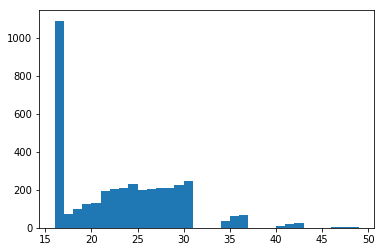

In [24]:
plt.hist(score_totals, bins=np.arange(16,50))